In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /usr/bin/python3 (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/lisandro/Documents/mt/tp3
-- Configuring done
-- Generating done
-- Build files have b

In [226]:
import metnum

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import util
import math
import os 
import time

In [269]:
df = df.drop(columns = ['id','titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','idzona','lat','lng','fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   antiguedad                  196445 non-null  float64
 1   habitaciones                217529 non-null  float64
 2   garages                     202235 non-null  float64
 3   banos                       213779 non-null  float64
 4   metroscubiertos             222600 non-null  float64
 5   metrostotales               188533 non-null  float64
 6   gimnasio                    240000 non-null  float64
 7   usosmultiples               240000 non-null  float64
 8   piscina                     240000 non-null  float64
 9   escuelascercanas            240000 non-null  float64
 10  centroscomercialescercanos  240000 non-null  float64
 11  precio                      240000 non-null  float64
 12  jacuzzi                     240000 non-null  int64  
dtypes: float64(12)

In [228]:
df_precio = df[['precio']]
df_precio.describe()

,precio
count,2.400000e+05
mean,2.530838e+06
std,2.152552e+06
min,3.100000e+05
25%,9.527725e+05
50%,1.850000e+06
75%,3.390000e+06
max,1.252500e+07


In [268]:
%%time

df = pd.read_csv('../data/train.csv')

## Creo un feature llamado jacuzzi. Vale 1 sii la descripción contiene 'jacuzzi'

jacuzzi_list = []

for x in range(len(df)):
    if (str(df['descripcion'][x])).find('jacuzzi') != -1:
        jacuzzi_list.append(1)
    else:
        jacuzzi_list.append(0)

print(count)
df['jacuzzi'] = jacuzzi_list

df.info()

9574
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona   

In [237]:
x = df_con_jacuzzi['metroscubiertos'].values
y = df_con_jacuzzi['precio'].values

x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

linear_regressor = metnum.LinearRegression
linear_regressor.fit(x,y)

TypeError: fit(): incompatible function arguments. The following argument types are supported:
    1. (self: metnum.LinearRegression, arg0: numpy.ndarray[float64[m, n]], arg1: numpy.ndarray[float64[m, n]]) -> None

Invoked with: array([[293.],
       [120.],
       [233.],
       ...,
       [198.],
       [130.],
       [160.]]), array([[4200000.],
       [ 610000.],
       [2000000.],
       ...,
       [3700000.],
       [1395000.],
       [1350000.]])

In [212]:
df = pd.read_csv('../data/train.csv')

{'rmse': [1481686.3513882118],
 'rmsle': [0.6369618527226388],
 'percentage_of_train_cases': [0.8],
 'time': [0.014633893966674805]}

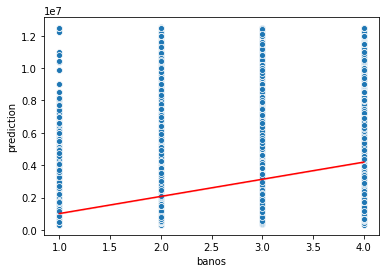

In [281]:
def calculate_metrics(variable_to_predict, df):
    df = df[df['prediction'].notna()]
    return (math.sqrt(mean_squared_error(df[variable_to_predict], df['prediction'])),
            math.sqrt(mean_squared_log_error(df[variable_to_predict]+1, df['prediction']+1)))

def experiment(percentage_of_training_cases,
         variable_to_predict,
         variables_to_study,
         seed, 
         df_old,
         data):
    df = df_old.copy(deep=True)
    
    t0 = time.time()
    
    TOTAL_TRAIN_CASES = int(percentage_of_training_cases*len(df))

    df = df[0:].sample(frac=1, random_state=seed)
    
    df_prediction = df[TOTAL_TRAIN_CASES:].copy(deep=True)

    df = df[:TOTAL_TRAIN_CASES]
    
    x_train, y_train = df[variables_to_study].values, df[variable_to_predict].values
    x_predict, y_predict = df_prediction[variables_to_study].values, df_prediction[variable_to_predict].values
    
    x_train = x_train.reshape(len(x_train),len(variables_to_study))
    y_train = y_train.reshape(len(y_train),1)
    x_predict = x_predict.reshape(len(x_predict),len(variables_to_study))
    y_predict = y_predict.reshape(len(y_predict),1)

    linear_regressor = metnum.LinearRegression()
    linear_regressor.fit(x_train, y_train)
    df_prediction['prediction'] = linear_regressor.predict(x_predict)

    t1 = time.time()
    total_time = (t1-t0)
    
    rmse, rmsle = calculate_metrics(variable_to_predict, df_prediction)
    data['rmse'].append(rmse)
    data['rmsle'].append(rmsle)
    data['percentage_of_train_cases'].append(percentage_of_training_cases)
    data['time'].append(total_time)
    
    if(len(variables_to_study)==1):
        sns.scatterplot(data=df, x=variables_to_study[0], y=variable_to_predict)
        sns.lineplot(data=df_prediction, x=variables_to_study[0], y='prediction', color='red')
    elif(len(variables_to_study)==2):
        fig = plt.figure(figsize=(20,10))
        ax = fig.gca(projection='3d')
        ax.set_xlabel('X', fontsize=15, rotation=150)
        ax.set_ylabel('Y')
        ax.set_zlabel(r'Z', fontsize=15)
        ax.scatter(df_prediction[variables_to_study[0]],
                   df_prediction[variables_to_study[1]],
                   df_prediction['prediction'], c='skyblue', s=60)
        ax.plot_trisurf(df_prediction[variables_to_study[0]], 
                        df_prediction[variables_to_study[1]], 
                        df_prediction['prediction'], cmap=plt.cm.viridis, linewidth=0.2)
        plt.show()
    return df_prediction
    

variable_to_predict = 'precio'
#variables_to_study = ['metroscubiertos','metrostotales','banos']
#variables_to_study = ['habitaciones','gimnasio','usosmultiples']
#variables_to_study = ['jacuzzi','piscina','gimnasio']
#variables_to_study = ['antiguedad','metroscubiertos','centroscomercialescercanos']
#variables_to_study = ['antiguedad']
#variables_to_study = ['metroscubiertos']
#variables_to_study = ['metrostotales']
#variables_to_study = ['antiguedad', 'banos', 'metroscubiertos', 'metrostotales', 'habitaciones', 'jacuzzi', 
#                     'centroscomercialescercanos', 'gimnasio', 'garages', 'usosmultiples', 'escuelascercanas', 'piscina']
variables_to_study = ['banos']

#cleanup
df = df[df[variable_to_predict].notna()]
for var in variables_to_study:
    df = df[df[var].notna()]


# df['centroscomercialescercanos'].hist()

d = {'rmse' : [], 'rmsle' : [], 'percentage_of_train_cases' : [], 'time' : []}


df_prediction_comodo = experiment(0.8, variable_to_predict, variables_to_study, 666, df, d)
    
d   